

> **1**. Load mnist through keras, binarize first 500 and randomly flip 2%.




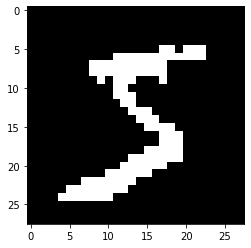

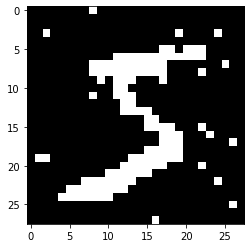

In [64]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import random

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnis.load_data()

data = []
for i in range(0,500):
    tmp = []
    tmp.append(y_train[i])
    tmp.append(x_train[i])
    data.append(tmp)

bi_data = np.ndarray((0,784))
for i in range(0,500):
    tmp = np.reshape((data[i][1]),(1,784))
    tmp = ((np.array(tmp)/255 > 0.5).astype(int))*2-1
    bi_data = np.append(bi_data,tmp,0)

original_data = [np.reshape(bi_data[i],(28,28)) for i in range(len(bi_data))]

plt.figure()
plt.imshow(bi_data[0].reshape(28,28),cmap='gray')

noisy_data = np.copy(bi_data)
for i in range(len(noisy_data)):
    for j in range(len(noisy_data[0])):
        if random.random() < 0.02:
            noisy_data[i][j] *= -1

plt.figure()
plt.imshow(noisy_data[0].reshape(28,28),cmap='gray')

> **2**. Implement Boltzmann machine model and mean field inference, get overall accuracy by comparing all (500*784) pixels with original one (binarized but without 2% flipping)

In [65]:
noisy_data_show = [np.reshape(noisy_data[i],(28,28)) for i in range(len(noisy_data))]

threshold = 0.01

def bz_res(pi):
    res = np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            #output[i][j] = int(pi[i][j] > 0.5) - int(not(pi[i][j] > 0.5))
            res[i][j] = int(pi[i][j] > 0.5) - int(pi[i][j] <= 0.5)
    return res

def boltzmann(img,theta_1,theta_2):
    pi = np.ones((28,28)) * 0.5
    prev_pi = np.ones((28,28))
    while True:
        for x in range(len(img)):
            for y in range(len(img[0])):
                z = 0
                if x > 0: z += theta_1 * (2*pi[x-1][y]-1)  + theta_2 *img[x-1][y]
                if x < 27: z += theta_1 * (2*pi[x+1][y]-1)  + theta_2 *img[x+1][y]
                if y > 0: z += theta_1 * (2*pi[x][y-1]-1)  + theta_2 *img[x][y-1]
                if y < 27: z += theta_1 * (2*pi[x][y+1]-1)  + theta_2 *img[x][y+1]
                tmp = np.exp(z)
                pi[x][y] = (tmp / (np.exp(-z) + tmp))
        dis = np.absolute(np.sum(prev_pi - pi))
        if  dis < threshold: break
        else: prev_pi = np.copy(pi)
    return pi

theta_1 = 0.2
theta_2 = 2

pi = np.zeros((500,28,28))
for i in range(len(pi)):
    pi[i] = boltzmann(noisy_data_show[i],theta_1,theta_2)
    
denoised_data = np.zeros((500,28,28))
for i in range(len(denoised_data)):
    denoised_data[i] = bz_res(pi[i])

frac_prob = (np.sum(denoised_data == original_data)) / (500.0*784.0)
print(frac_prob)

0.9809056122448979


> **3**. Get figures for largest accuracy

Largest Accuracy:  0.9961734693877551


(-0.5, 27.5, 27.5, -0.5)

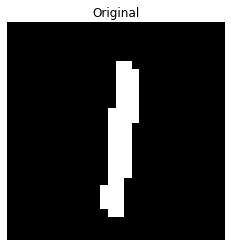

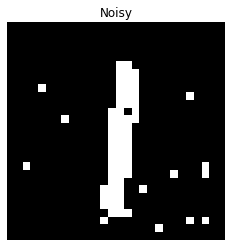

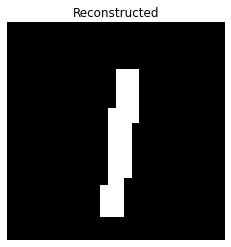

In [69]:
accuracy = np.zeros(500)
for i in range(0,500):
    accuracy[i] = np.sum(denoised_data[i] == original_data[i]) / 784.0

max_index = np.argmax(accuracy)
min_index = np.argmin(accuracy)

print("Largest Accuracy: ", accuracy[max_index])
plt.imshow(original_data[max_index],cmap="gray")
plt.title('Original')
plt.axis('off')
plt.figure()
plt.imshow(noisy_data_show[max_index],cmap="gray")
plt.title('Noisy')
plt.axis('off')
plt.figure()
plt.imshow(denoised_data[max_index],cmap="gray")
plt.title('Reconstructed')
plt.axis('off')

> **4**. Get figures for smallest accuracy

Smallest Accuracy:  0.9349489795918368


(-0.5, 27.5, 27.5, -0.5)

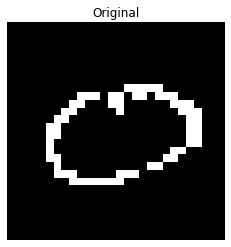

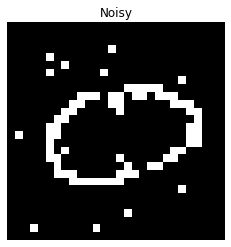

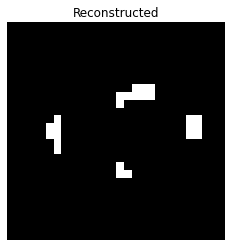

In [70]:
print("Smallest Accuracy: ", accuracy[min_index])
plt.imshow(original_data[min_index],cmap="gray")
plt.title('Original')
plt.axis('off')
plt.figure()
plt.imshow(noisy_data_show[min_index],cmap="gray")
plt.title('Noisy')
plt.axis('off')
plt.figure()
plt.imshow(denoised_data[min_index],cmap="gray")
plt.title('Reconstructed')
plt.axis('off')